Names: Patrick, Cuiyi, Reagan, Clinton

In [1]:
# your import statements
import numpy as np
import matplotlib.pyplot as plt

## WorkSheet Instructions ##

Before you begin you should have read and worked through Lab 3.

 I recommend that you do this worksheet in a python
  notebook and share screen.  This method does mean one person will do the typing.  When complete, email the notebook (preferably as a pdf)
  to sallen@eoas.ubc.ca
  
*This worksheet is based on Question 2 from the lab*

### Question A ###

Compute the condition number for the matrix that arises from the Heat Equation using Dirchlet BC for various values of the number of segments, N, the rod is divided into. Note that N segments means N+1 grid points. Consider values of N between 5 and 50.  Remember that python starts counting from 0 (not 1).

(Hint: This will be much easier if you write a small Python function that outputs the matrix for a given value of N.)

The Matrix is:


$$A_1 = {\left[
          \begin{array}{ccccccccc}
            1&  0  & & \dots  & & & & & 0 \\
            1& {-2} & {1} & {0} & {\dots} & && &  \\
            0& {1} & {-2} &  {1} & {0} & {\dots} & & &  \\
            & {0} & {1}  & {-2} & {1} & {0} & {\dots} & &  \\
            & & & & & & & & \\
            \vdots & & & {\ddots} & {\ddots} & {\ddots} & {\ddots} & {\ddots} & \vdots \\
            & & & & & & & & \\
            & & & {\dots} & {0} & {1} & {-2} & {1} & 0 \\
            & &  & &{\dots} & {0} & {1} & {-2} & 1 \\
            0& & & & & \dots & & 0 & 1 \\
          \end{array}
        \right]}
$$    

In [2]:
# function that outputs matrix for a given value of N
def differential_matrix_equation(N):
    a=np.zeros((N+1,N+1))
    a[0,0]=1
    a[N,N]=1
    for i in range(1,N):
        for j in range(0,N+1):
            if (i==j):
                a[i,j]=-2
            if (i-j==1):
                a[i,j]=1
            if (j-i==1):
                a[i,j]=1
    return a

print("Example of matrix A1 for N=5:\n",differential_matrix_equation(5))

# DEFINING values for N
Ns = np.array([int(n) for n in np.linspace(5,50,20)])


Example of matrix A1 for N=5:
 [[ 1.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  1.]]


In [3]:
# cell to calculate the condition number for various N
cd_nrs = []

for N in Ns:
    A = differential_matrix_equation(N)
    cd_nr = np.linalg.cond(A,p='fro')
    cd_nrs.append(cd_nr)
    print("For N =",N,", condition number for A1 is:",round(cd_nr,2))

For N = 5 , condition number for A1 is: 17.66
For N = 7 , condition number for A1 is: 35.79
For N = 9 , condition number for A1 is: 64.09
For N = 12 , condition number for A1 is: 128.65
For N = 14 , condition number for A1 is: 188.17
For N = 16 , condition number for A1 is: 262.14
For N = 19 , condition number for A1 is: 402.35
For N = 21 , condition number for A1 is: 516.67
For N = 23 , condition number for A1 is: 648.7
For N = 26 , condition number for A1 is: 881.71
For N = 28 , condition number for A1 is: 1061.52
For N = 31 , condition number for A1 is: 1369.8
For N = 33 , condition number for A1 is: 1602.07
For N = 35 , condition number for A1 is: 1856.55
For N = 38 , condition number for A1 is: 2281.35
For N = 40 , condition number for A1 is: 2594.21
For N = 42 , condition number for A1 is: 2931.52
For N = 45 , condition number for A1 is: 3484.66
For N = 47 , condition number for A1 is: 3885.72
For N = 50 , condition number for A1 is: 4537.21


### Question B ###

Plot your results on a log-log plot (that is log condition number versus log N)

Also plot N$^2$ on the same plot.

How does the conition number of A$_1$ depend on N?

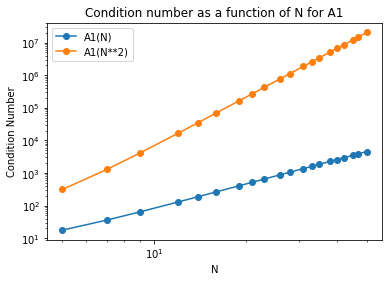

The condition number grows exponentially with N - therefore so is N**2. 
As N increases, the numerical resolution becomes less stable due to ill conditioning.


In [4]:
# code to do the plot
y1 = np.array(cd_nrs)

plt.loglog(Ns,y1,marker='o',label="A1(N)")
plt.loglog(Ns,y1**2,marker='o',label="A1(N**2)")
plt.legend()
plt.xlabel('N')
plt.ylabel('Condition Number')
plt.title("Condition number as a function of N for A1")
plt.show()

print("The condition number grows exponentially with N - therefore so is N**2. \nAs N increases, the numerical resolution becomes less stable due to ill conditioning.")

### Question C ###

Another way to write the system of equations  Another way to write the system of equations is to substitute the
boundary conditions into the equations, and thereby reduce size of the
problem to one of N-1 equations in N-1 unknowns. The corresponding
matrix is simply the N-1 by N-1 submatrix of A$_1$
$$A_2 = {\left[
    \begin{array}{ccccccc}
    -2 &  1 &  0 & \dots & && 0 \\
    1 & -2 &  1 & 0 & \dots & & \\
    0 & 1  & -2 & 1 & 0 & \dots &  \\
    & & & & & & \\
    \vdots & & \ddots & \ddots& \ddots & \ddots & \vdots\\
    & & & & & & 0 \\
    & & \dots & 0 & 1 & -2 & 1 \\
    0&  & &\dots & 0 & 1 & -2 \\
    \end{array}
    \right]}
    $$ 
    
Does this change in the matrix make a significant difference in the
    condition number?

In [5]:
# new function that outputs the matrix A_2 for a given value of N
def differential_matrix_equation_2(N):
    a=np.zeros((N+1,N+1))
    a[0,0]=-2
    a[0,1]=1
    a[N,N-1]=1
    a[N,N]=-2
    for i in range(1,N):
        for j in range(0,N+1):
            if (i==j):
                a[i,j]=-2
            if (i-j==1):
                a[i,j]=1
            if (j-i==1):
                a[i,j]=1
    return a

print("Example of matrix A2 for N=5:\n",differential_matrix_equation_2(5))

Example of matrix A2 for N=5:
 [[-2.  1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1. -2.]]


In [6]:
# cell to caculate the condition number for various N
cd_nrs = []

for N in Ns:
    A = differential_matrix_equation_2(N)
    cd_nr = np.linalg.cond(A,p='fro')
    cd_nrs.append(cd_nr)
    print("For N =",N,", condition number for A2 is:",round(cd_nr,2))

For N = 5 , condition number for A2 is: 30.85
For N = 7 , condition number for A2 is: 58.78
For N = 9 , condition number for A2 is: 98.12
For N = 12 , condition number for A2 is: 181.25
For N = 14 , condition number for A2 is: 254.37
For N = 16 , condition number for A2 is: 342.84
For N = 19 , condition number for A2 is: 506.39
For N = 21 , condition number for A2 is: 637.28
For N = 23 , condition number for A2 is: 786.63
For N = 26 , condition number for A2 is: 1047.0
For N = 28 , condition number for A2 is: 1245.91
For N = 31 , condition number for A2 is: 1584.09
For N = 33 , condition number for A2 is: 1837.1
For N = 35 , condition number for A2 is: 2112.93
For N = 38 , condition number for A2 is: 2570.88
For N = 40 , condition number for A2 is: 2906.56
For N = 42 , condition number for A2 is: 3267.26
For N = 45 , condition number for A2 is: 3856.52
For N = 47 , condition number for A2 is: 4282.33
For N = 50 , condition number for A2 is: 4971.9


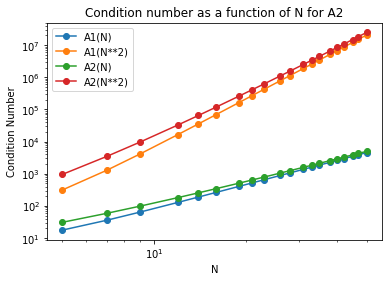

In [7]:
# log log plot comparing
y2 = np.array(cd_nrs)

plt.loglog(Ns,y1,marker='o',label="A1(N)")
plt.loglog(Ns,y1**2,marker='o',label="A1(N**2)")
plt.loglog(Ns,y2,marker='o',label="A2(N)")
plt.loglog(Ns,y2**2,marker='o',label="A2(N**2)")
plt.legend()
plt.xlabel('N')
plt.ylabel('Condition Number')
plt.title("Condition number as a function of N for A2")
plt.show()

In [8]:
print("Changing the boundary conditions (A1 vs A2) only generates small numerical differences in condition number,\n but the asymptotic behaviour (large values of N) is the same.")


Changing the boundary conditions (A1 vs A2) only generates small numerical differences in condition number,
 but the asymptotic behaviour (large values of N) is the same.
